# `002-diagnose-basic-classifier`

Task: plot a confusion matrix, find images that were misclassified

## Setup

In [1]:
# setup fastai if needed
try: import fastbook
except ImportError: import subprocess; subprocess.run(['pip','install','-Uq','fastbook'])

# Import fastai code.
from fastai.vision.all import *
from fastai.vision.widgets import *

# Set a seed for reproducibility.
set_seed(12345, reproducible=True)

## Task

Starting with the classifier of notebook `000`:

1. Show one batch from each of the training and validation sets.
2. Plot the confusion matrix.
3. Find some images that were misclassified.

## Solution

In [2]:
# Classifier
path = untar_data(URLs.PETS)/'images'

def is_cat(x):
    return "cat" if x[0].isupper() else "dog"

dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid_pct=0.2, seed=42,
    label_func=is_cat, item_tfms=Resize(224)
)

learn = cnn_learner(dls, resnet34, metrics=error_rate)

In [3]:
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.135722,0.021258,0.008119,01:39


epoch,train_loss,valid_loss,error_rate,time
0,0.067543,0.027263,0.008796,02:14


### Problem 1

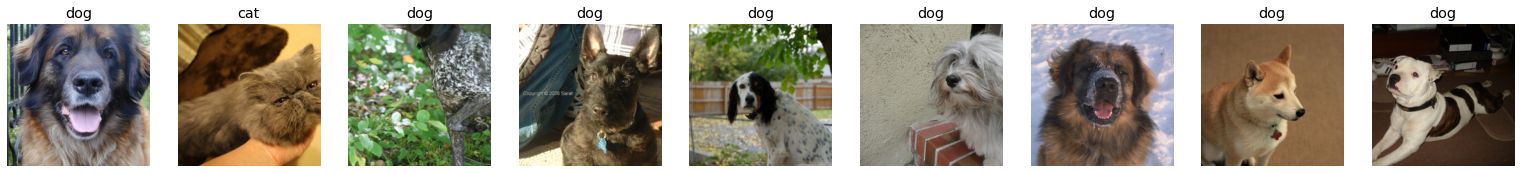

In [4]:
# Show training set
dls.train.show_batch(nrows=1)

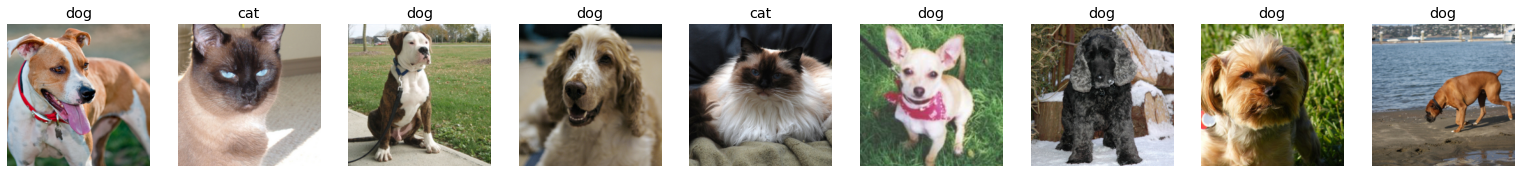

In [5]:
# Show validation set
dls.valid.show_batch(nrows=1)

### Problem 2

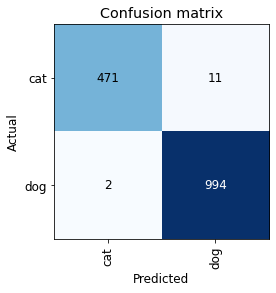

In [6]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

### Problem 3

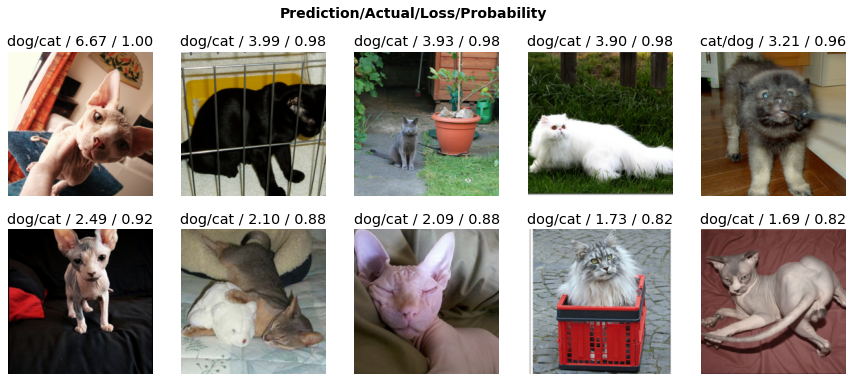

In [7]:
interp.plot_top_losses(10, nrows=2)

## Analysis

**How many dogs were misclassified as cats? Vice versa?**

2 dogs were classified as cats, and 11 cats were classified as dogs.

**Is the confusion matrix plotted on the training set or the validation set?**

The confusion matrix is plotted on the validation set. The validation set is essentially an evaluation of how accurate the model is, so the classifier making incorrect predictions can only happen with the validation set (since the training set requires no predicting).

**Were there any mislabeled images in the training set? Which ones?**

In [8]:
# cleaner = ImageClassifierCleaner(learn)

The line above fails since not enough memory can be allocated to it. I currently don't know of any ways to find mislabeled images in the training set other than browsing through all of them and manually comparing the images and their labels.